In [25]:
#pick libraries I want to use
import pandas as pd
import numpy as np

#create objects to work on (tables) - paste the link of the files from the folder in the left
mushrooms = pd.read_csv("/content/mushrooms.csv")


#Lets go!



['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']


In [5]:
#pick libraries I want to use

import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr
from sklearn import metrics

In [17]:
def conversion_list_to_set(df,col):
  ls=list(set(list(df[col]))) #list of the values in the col
  return ls

In [31]:
from sklearn import preprocessing

def labels_encoder(df):
  lst=list(df.columns)[1:]
  for i in lst:
    col = set(df[i].values)
    le = preprocessing.LabelEncoder()
    le.fit(list(col))
    le.classes_
    le.transform(conversion_list_to_set(df,i))
    #le.transform(cupshape)
    l = le.transform(df[i].values)
    df[i] = l

    return df

mushrooms1=labels_encoder(mushrooms)


#first, test train split
train_df, test_df = train_test_split(mushrooms1, test_size=0.2)

mushrooms1

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,e,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,e,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,p,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,e,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,e,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,e,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,p,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [42]:
#model creation
knn_classifier = KNeighborsClassifier(n_neighbors=3)
featues_list = list(mushrooms1.columns)[1:] #change to df, make it more general later
knn_classifier.fit(train_df[featues_list], train_df["class"].values) #change to something more generic for the project 
#test
class_values_test_list= test_df["class"].values
predict_class_list = knn_classifier.predict(test_df[featues_list])
predict_class_list


array(['p', 'p', 'p', ..., 'p', 'p', 'p'], dtype=object)

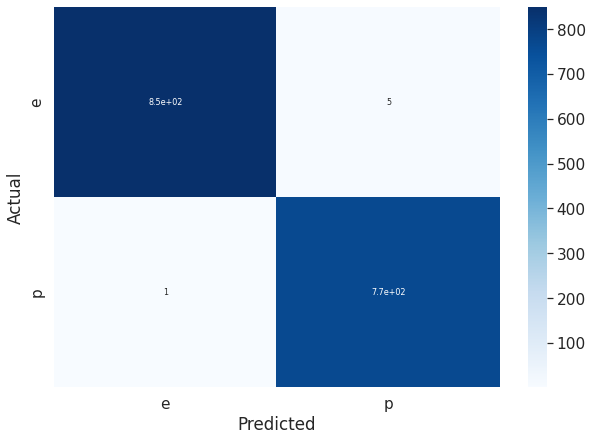

In [40]:
#assembling a confusion metrics as a heat map
from sklearn import metrics
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
cm = metrics.confusion_matrix(class_values_test_list,predict_class_list)
df_cm = pd.DataFrame(cm, columns=knn_classifier.classes_, index = knn_classifier.classes_)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 8})# font size

In [41]:
#checking the model's accuracy and f1 
#accuracy:
accuracy = metrics.accuracy_score(class_values_test_list,predict_class_list)
print(f'model\'s acurracy is: {accuracy}')
#f1 score:
from sklearn.metrics import f1_score
f1 = f1_score(class_values_test_list,predict_class_list, average='macro') #for each category individually
print(f'model\'s F1 is: {f1}')

model's acurracy is: 0.9963076923076923
model's F1 is: 0.9962984954048194


בבלוק הבא אנחנו בודקים מהו מס השכנים האופטימלי :)
ואחכ נשתמש בזה כהמלצה למשתמש בהזנת מספר שכנים


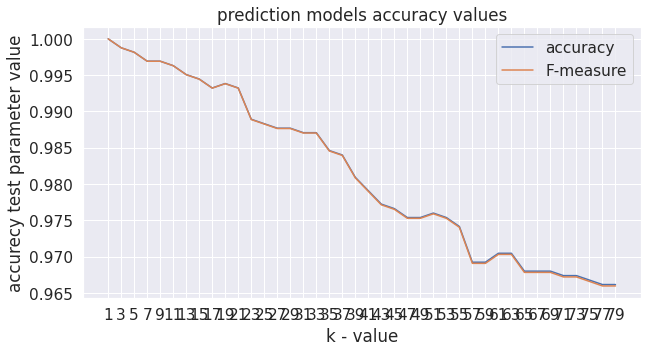

In [45]:
k_values = []
accuracy_values = []
f1_values = []
#the determine max number of neighbors
max_neighbors=int(mushrooms1.shape[0]*0.01) #change later to something more generic , max_neighbors would be 1% of the total number of rows in the set
featues_list = list(mushrooms1.columns)[1:] #change to df, make it more general later

for k in range(1,max_neighbors,2): 
  #model creation
  knn_classifier = KNeighborsClassifier(n_neighbors=k)
  
  knn_classifier.fit(train_df[featues_list], train_df["class"].values) #change to something more generic for the project 
  #test
  class_values_test_list= test_df["class"].values
  predict_class_list = knn_classifier.predict(test_df[featues_list])

  accuracy = metrics.accuracy_score(class_values_test_list,predict_class_list)
  f1 = f1_score(class_values_test_list,predict_class_list, average='macro') #for each category individually

  #creating series for plots:
  k_values.append(k)
  accuracy_values.append(accuracy)
  f1_values.append(f1)
#and plotting the predictions:
y = accuracy_values
z = f1_values
ki = list(range(len(k_values)))
plt.figure(figsize=(10,5))
plt.plot(ki, y, label='accuracy')
plt.plot(ki, z, label='F-measure')

plt.xticks(ki, k_values)
plt.xlabel("k - value")
plt.ylabel("accurecy test parameter value")
plt.title("prediction models accuracy values")

plt.legend()

מודל KMEANS


In [51]:
from sklearn.cluster import KMeans
featues_list = list(mushrooms.columns)[1:] #change to df, make it more general later
k_est_3 = KMeans(n_clusters=3)
k_est_3.fit(mushrooms[featues_list]) 
k_est_3.labels_
mushrooms['which_cluster'] = k_est_3.labels_
mushrooms
#print(set(mushrooms['which_cluster']))
#k_est_3.cluster_centers_ ---> these are the cordinates of the center points in each of the clusters .

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,which_cluster
0,p,5,2,4,1,6,1,0,1,4,...,7,7,0,2,1,4,2,3,5,1
1,e,5,2,9,1,0,1,0,0,4,...,7,7,0,2,1,4,3,2,1,1
2,e,0,2,8,1,3,1,0,0,5,...,7,7,0,2,1,4,3,2,3,1
3,p,5,3,8,1,6,1,0,1,5,...,7,7,0,2,1,4,2,3,5,1
4,e,5,2,3,0,5,1,1,0,4,...,7,7,0,2,1,0,3,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,3,2,4,0,5,0,0,0,11,...,5,5,0,1,1,4,0,1,2,0
8120,e,5,2,4,0,5,0,0,0,11,...,5,5,0,0,1,4,0,4,2,0
8121,e,2,2,4,0,5,0,0,0,5,...,5,5,0,1,1,4,0,1,2,1
8122,p,3,3,4,0,8,1,0,1,0,...,7,7,0,2,1,0,7,4,2,2
